<a href="https://colab.research.google.com/github/MoKaif/handwritten_Digit_Prediction/blob/main/Handwritten_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Prediction**

-------------

## **Objective**

Build a machine learning model to classify handwritten digits from the popular MNIST dataset using a neural network. The goal is to preprocess the data, design and train a neural network model, and assess its performance through accuracy, a confusion matrix, and a detailed classification report.

## **Data Source**

We will be using the load_digits from sklearn for our model

## **Import Library**

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

We import necessary libraries: NumPy for numerical operations, Matplotlib for plotting, Seaborn for data visualization, Scikit-learn for dataset loading, preprocessing, and metrics, and TensorFlow and Keras for building and training the neural network model.

## **Import Data**

In [32]:
from sklearn.datasets import load_digits

In [33]:
# Load the digits dataset
digits = load_digits()

# Create a DataFrame for data exploration (optional)
df = pd.DataFrame(digits.data, columns=[f"pixel_{i}" for i in range(digits.data.shape[1])])
df['target'] = digits.target

We load the handwritten digits dataset using load_digits() from Scikit-learn.

## **Describe Data**

In [34]:
# Display basic dataset information
print("Number of samples:", digits.data.shape[0])
print("Number of features per sample:", digits.data.shape[1])
print("Number of unique classes:", len(np.unique(digits.target)))

Number of samples: 1797
Number of features per sample: 64
Number of unique classes: 10


## **Data Visualization**

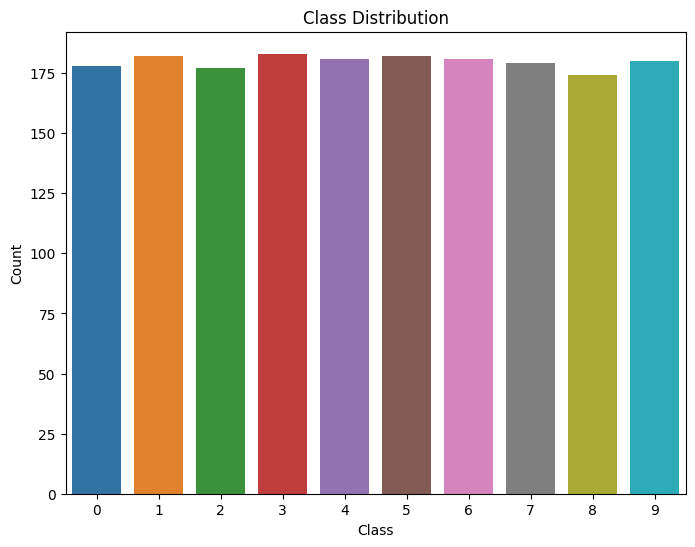

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x=digits.target)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

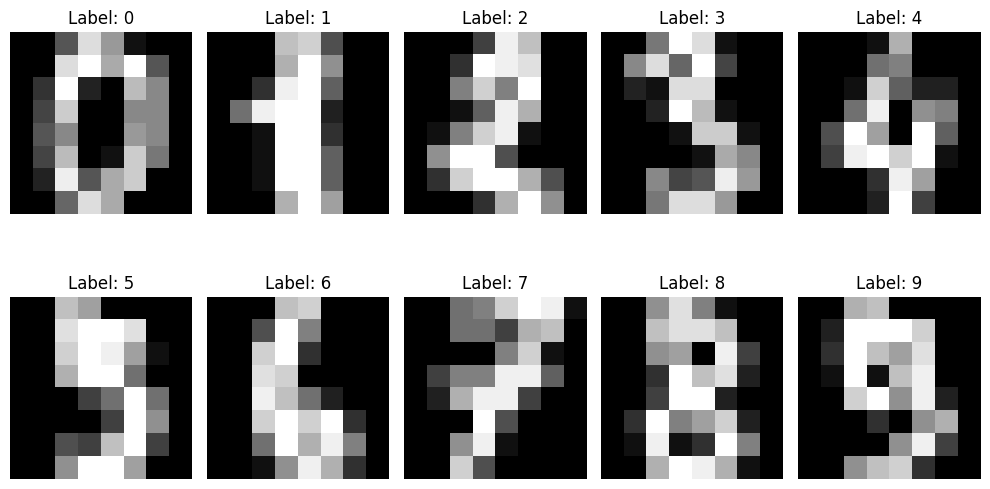

In [36]:
# Display a few example images
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [37]:
digits.images.shape

(1797, 8, 8)

In [38]:
X = digits.data.reshape(digits.data.shape[0], -1)
y = digits.target

# Data Scaling: Standardize features (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



*   We reshape the image data (X) to flatten the 2D images into 1D arrays, which is required for training. We also assign the target labels to y.
*   We create a StandardScaler object and use it to standardize the feature data (X_scaled). This step ensures that all features have a mean of 0 and a standard deviation of 1, which can help the neural network converge more effectively.



## **Train Test Split**

We split the standardized data into training and testing sets using the train_test_split function. This step ensures that we have separate datasets for training and evaluating the model's performance.

In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Modeling**

We define a neural network model using Keras' Sequential API. The model consists of three layers: two hidden layers with ReLU activation functions and a final output layer with a softmax activation function.

We compile the model by specifying the optimizer, loss function, and evaluation metrics. In this case, we use the Adam optimizer, sparse categorical cross-entropy loss (suitable for multiclass classification), and accuracy as the evaluation metric.

In [40]:
# Build a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with scaled data
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
41/41 [==============================] - 1s 7ms/step - loss: 1.8119 - accuracy: 0.4981 - val_loss: 1.1801 - val_accuracy: 0.8472
Epoch 2/20
41/41 [==============================] - 0s 3ms/step - loss: 0.8403 - accuracy: 0.8237 - val_loss: 0.5291 - val_accuracy: 0.9236
Epoch 3/20
41/41 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.9172 - val_loss: 0.3238 - val_accuracy: 0.9375
Epoch 4/20
41/41 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9466 - val_loss: 0.2301 - val_accuracy: 0.9514
Epoch 5/20
41/41 [==============================] - 0s 3ms/step - loss: 0.1566 - accuracy: 0.9683 - val_loss: 0.2013 - val_accuracy: 0.9583
Epoch 6/20
41/41 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9768 - val_loss: 0.1801 - val_accuracy: 0.9653
Epoch 7/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9845 - val_loss: 0.1741 - val_accuracy: 0.9583
Epoch 8/20
41/41 [==

We train the model using the training data (X_train and y_train). We train for 20 epochs with a batch size of 32 and also specify a validation split of 10% for monitoring the model's performance during training

## **Model Evaluation**

In [41]:
# Evaluate the model on the scaled test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

12/12 - 0s - loss: 0.0920 - accuracy: 0.9694 - 41ms/epoch - 3ms/step

Test accuracy: 0.9694444537162781


## **Prediction**

12/12 [==============================] - 0s 2ms/step


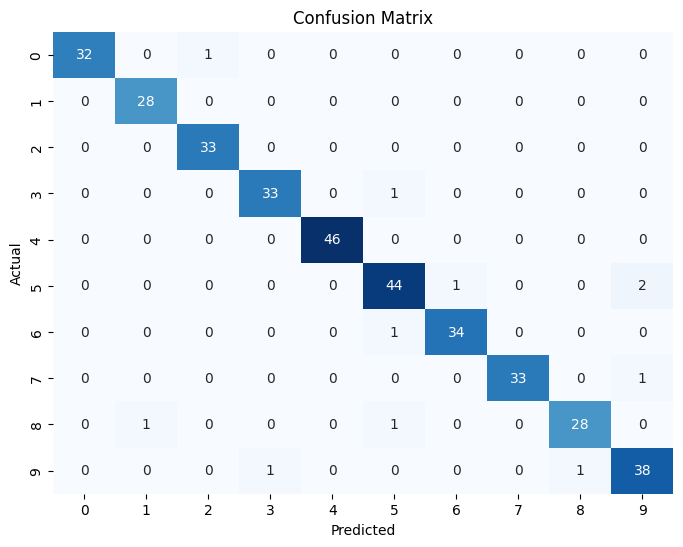

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [43]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

## **Explaination**

#### Handwritten Digit Classification Workflow

This code performs the following steps for handwritten digit classification:

1. **Data Loading and Preprocessing:**
   - Load and preprocess the dataset of handwritten digits.
   - Flatten image pixels to create feature vectors.
   - Apply feature scaling using standardization.

2. **Neural Network Model Building and Training:**
   - Construct a neural network model using Keras' `Sequential` API.
   - Define layers with appropriate activation functions.
   - Compile the model with optimizer, loss function, and metrics.
   - Train the model on scaled training data with epochs and batch size.
   - Monitor model performance using a validation split.

3. **Model Evaluation:**
   - Evaluate the trained model's accuracy on scaled test data.
   - Test accuracy provides an overall performance measure.

4. **Confusion Matrix Visualization:**
   - Generate predictions using the trained model for test data.
   - Compute a confusion matrix to visualize predictions vs. actual labels.
   - Use a heatmap for an informative confusion matrix display.

5. **Classification Report Generation:**
   - Generate a detailed classification report with precision, recall, F1-score, and support metrics for each class.
   - Classification report offers a comprehensive class-wise performance analysis.

These steps collectively provide insights into the model's performance, strengths, and areas for improvement in handwritten digit classification.
